In [1]:
%matplotlib inline

In [2]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
from tqdm.notebook import tqdm

import Mask_Proj_Env as Env
import Sub_Agent as sub_agent
import Master_Agent as master_agent
import cv2
import sys

In [3]:
main_path = "./images/"
img_path = "image.jpg"
msk_path = 'mask.jpg'

    
load_image, load_mask = Env.load_image_mask(main_path, img_path, msk_path)

env = Env.Mask_Proj_Env(load_image, load_mask)

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [15]:
def plot_rewards(episode_rewards):
    plt.figure(1)
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.plot(episode_rewards)



In [5]:
still_action = env.STILL
vertical_actions = [env.UP, env.DOWN]
horizontal_actions = [env.LEFT, env.RIGHT]
rotation_actions = [env.CLOCKWISE, env.COUNTER]
scaling_actions = [env.INCREASE, env.DECREASE]

actions={
    "vertical" : vertical_actions,
    "horizontal": horizontal_actions, 
    "rotation" : rotation_actions,
    "scaling" : scaling_actions
}


# Number of actions
n_actions_manager = 5

In [6]:
# Q Window of Master Agent
N_master = 5 

steps_done = 0
episode_rewards = []
manhattans = []

# master & sub agents have a MAX number of possible steps
max_step_master = 1000
max_step_sub = 100
# you need a high number of episodes to make the agent learn properly
# increase the num_episodes variable and go take a coffee while the agent learns
num_episodes = 10

agent_info = {
    "window_size":N_master, "num_actions":n_actions_manager, "num_states":4, "still":0, "actions":actions, "step_size":1, 
    "agent_size":3, "path":"", "debug":False, "learning":True    
}

master = master_agent.Master_Agent()
master.agent_init(agent_info)

In [7]:
# Train agent
for i_episode in  tqdm(range(num_episodes)):
    obs, reward = env.reset()
    master.agent_start(obs)
    
    for t in  tqdm(range(max_step_master)):
        action = master.agent_step(obs, reward, False)
        obs, reward, done, info = env.step(action, False)
        rewards=t
        if done:
            break
    episode_rewards.append(t)
    manhattans.append(env.manhattan)
    
# running this cell you will see the numbers of step that the agent needs to align from a random position  
#

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

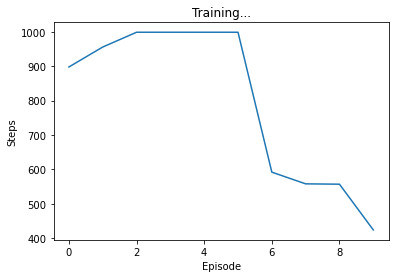

In [16]:
#plot number of steps to arrive at the solution
plot_rewards(np.array(episode_rewards))

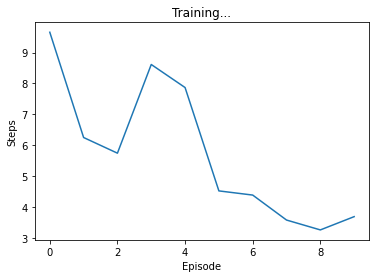

In [17]:
# same as the previous cell but normalize the steps with the original distance of each random episode
plot_rewards(np.array(episode_rewards)/np.array(manhattans))

In [12]:
# make a gif
images=[]
obs=0
for i in range(1000):
    action = master.agent_step(obs, reward, False)
    obs, reward, done, _ = env.step(action, False)
    img = env.render()
    images.append(img)
    if done or obs==1000:
        break

print(obs)

imageio.mimsave('test_HRL.gif', images[:], fps=10)

1000
